In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
df = pd.read_csv('desktop/earthquakes5.csv')

In [4]:
df.dropna(subset=['depth','mag','gap','dmin','rms','horizontalError', 'magError', 'depthError', 'latitude', 'longitude', 'magNst'])
X = df.drop(columns=['time','magType', 'nst', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource','mag'])
y = df['mag']
print (X)
print (y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

     latitude  longitude  depth  gap   dmin   rms  horizontalError  \
0     48.3780   154.9620  35.00   92  5.044  0.63              7.6   
1     36.0733   139.7830  48.82  113  1.359  1.13              6.0   
2     38.8576   141.8384  50.56  145  1.286  0.84              8.4   
3     50.0727   156.1420  66.34  128  3.191  0.62              9.7   
4     33.9500   134.4942  38.19  104  0.558  0.61              3.4   
..        ...        ...    ...  ...    ...   ...              ...   
822   40.1002   139.5860   7.09   99  1.322  0.88              2.8   
823   40.0387   143.4878  10.00  101  1.990  0.65              5.9   
824   49.8077   156.1112  85.70  160  3.451  0.56             10.3   
825   45.2765   124.7037  10.00   40  3.533  0.68              5.8   
826   32.2466   140.2639  97.98  116  0.945  0.71              7.2   

     depthError  magError  magNst  
0           1.7     0.036     248  
1           6.1     0.071      19  
2           9.5     0.156      12  
3           7.8

In [3]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
Linear_predictions = regression.predict(X_test)
print (Linear_predictions) 
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Linear_predictions)
print (r2)

[4.663537   4.65141818 4.79540027 4.61746419 4.69150848 4.99514873
 4.59403498 4.79211976 4.73296021 4.8976532  4.71679895 4.34798937
 4.70363156 5.16385862 4.98044331 4.52433902 4.60061666 4.83360237
 4.82135679 4.80585621 4.74030432 4.76271184 4.9552801  4.60193681
 4.96877126 4.8301772  4.58257442 4.9031634  4.51932331 4.66028557
 4.74841867 4.70181892 4.50787777 5.38003253 4.88333362 4.9415841
 5.00450589 4.75128994 4.80511113 5.28777878 4.89161381 5.30231564
 4.8740078  4.76262401 4.60695835 4.96281307 4.80004372 4.68931793
 4.84966464 5.2645167  4.86663203 4.60537233 4.7449562  4.57942945
 5.20223516 4.97624436 4.48653442 5.11095164 4.63647113 4.86490936
 4.97423369 4.67494354 4.80051669 4.73621417 5.10564847 4.72564565
 4.71679054 5.19506087 4.44914243 4.59796512 4.7226337  4.71447874
 4.82347101 4.67879813 4.99027252 4.93357407 4.61965035 4.83491188
 4.61916066 4.66326352 4.68299139 4.49482097 4.58230369 4.57831111
 4.71321426 4.68156064 4.95964375 4.48640621 4.65208103 4.66001

In [4]:
regression = linear_model.Lasso(alpha=0.2)
regression.fit(X_train, y_train)
Lasso_predictions = regression.predict(X_test)
print (Lasso_predictions)
r2 = r2_score(y_test, Lasso_predictions)
print (r2)

[4.68090965 4.65937116 4.79021111 4.62582806 4.66560613 4.9102196
 4.5445054  4.73910388 4.75723901 4.88526083 4.71482633 4.52185456
 4.70919596 5.06779687 4.95769536 4.55041355 4.55423655 4.82795738
 4.88320868 4.72610329 4.79641898 4.74543946 4.96183826 4.73474762
 4.88277096 4.85980838 4.61988405 4.91361911 4.61669179 4.75076205
 4.67303126 4.68958261 4.6650344  5.27876017 4.90137304 4.97161278
 4.97959431 4.80751652 4.73666612 5.20211287 4.96716701 5.24912495
 5.01636568 4.78774039 4.64320598 4.97468022 5.04276873 4.66289217
 4.78350051 5.18037802 4.77399515 4.58307299 4.65225387 4.58931974
 5.16010993 4.97648636 4.6296002  5.06799583 4.65162446 4.90464978
 4.93915913 4.70884529 4.77868756 4.72619668 5.01899539 4.71623082
 4.68609741 5.12831688 4.47497796 4.61058193 4.63784945 4.77567596
 4.74703915 4.78679633 5.03133779 4.95909628 4.69131635 4.75020599
 4.65570818 4.71091678 4.62423968 4.49796823 4.64527958 4.42784515
 4.66713673 4.68054648 4.99249398 4.57748926 4.70724693 4.64957

In [5]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(n_estimators = 1000)
regression.fit(X_train, y_train)
Random_predictions = regression.predict(X_test)
print (Random_predictions)
r2 = r2_score(y_test, Random_predictions)
print (r2)

[4.5966 4.5833 4.7012 4.6247 4.8219 4.6719 4.5792 4.8113 4.8934 4.6668
 4.5896 4.5319 4.5989 5.2334 4.7257 4.5732 4.5851 4.5916 4.7055 4.7472
 4.6323 4.8067 5.2187 4.54   4.6941 4.732  4.6009 5.0889 4.5282 4.5767
 4.767  4.7256 4.5119 5.6609 4.5963 4.9224 4.8585 4.6427 4.703  5.5332
 4.8584 5.6374 5.0567 4.6551 4.5488 5.0286 4.8614 4.6402 4.6302 5.7195
 4.7682 4.5555 4.6395 4.5802 5.2588 4.7757 4.5778 5.6706 4.7231 4.6886
 4.7424 4.7954 4.6292 4.773  4.9293 4.7292 4.7009 5.5441 4.5579 4.5773
 4.6478 4.6228 4.7497 4.5685 5.0547 4.9109 4.5919 4.8227 4.9321 4.7265
 4.5975 4.6023 4.5682 4.6247 4.7983 4.6853 4.8875 4.5449 4.6284 4.6528
 4.5885 4.5784 4.7665 4.7691 4.5506 4.5752 4.6206 4.6304 4.9164 4.7826
 4.5813 4.7458 4.7555 5.2612 4.6618 5.1909 4.8589 4.5559 4.5584 4.6571
 4.6438 4.7081 4.5765 4.5402 4.656  4.9888 4.6833 5.015  4.6342 4.7275
 4.6353 4.5793 4.7656 4.8298 4.6728 4.9396 4.9008 4.5453 4.8619 4.8137
 4.84   4.8233 4.6431 4.6944 4.7771 4.7586 5.1442 4.6954 4.5782 4.6237
 4.598

In [6]:
y_test

767    4.9
612    4.5
596    4.8
778    4.6
293    4.7
      ... 
367    5.0
797    4.6
702    4.9
822    4.6
129    4.6
Name: mag, Length: 166, dtype: float64

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
print (mean_squared_error(y_test, Linear_predictions))
print (mean_squared_error(y_test, Lasso_predictions))
print (mean_squared_error(y_test, Random_predictions))

0.07248956195179268
0.06797857035536627
0.034299858614457494


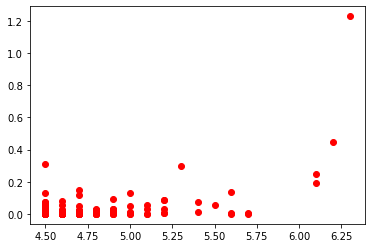

In [10]:
for i in range(0,166):
    plt.plot(y_test.iat[i], (abs(y_test.iat[i]-Random_predictions[i])*abs(y_test.iat[i]-Random_predictions[i])), 'ro')
plt.show()

,depth,mag,gap,dmin,rms,horizontalError,magError,depthError,latitude,longitude,magNst
depth,1.000000,0.019820,-0.131725,0.036721,0.000372,0.169074,-0.164053,0.303146,0.115954,0.067379,0.268505
mag,0.019820,1.000000,-0.583286,-0.018212,0.032035,-0.186082,-0.339636,-0.339038,0.041054,0.017595,0.163934
gap,-0.131725,-0.583286,1.000000,0.271421,-0.091635,0.420685,0.319012,0.355597,0.240605,0.378855,-0.164950
dmin,0.036721,-0.018212,0.271421,1.000000,-0.103323,0.494274,-0.070169,0.032681,0.408161,0.543854,0.157205
rms,0.000372,0.032035,-0.091635,-0.103323,1.000000,-0.119517,0.043108,-0.030571,-0.109787,-0.106985,-0.029938
horizontalError,0.169074,-0.186082,0.420685,0.494274,-0.119517,1.000000,0.066527,0.255864,0.154308,0.422239,0.016851
magError,-0.164053,-0.339636,0.319012,-0.070169,0.043108,0.066527,1.000000,0.039522,-0.180593,-0.126480,-0.537115
depthError,0.303146,-0.339038,0.355597,0.032681,-0.030571,0.255864,0.039522,1.000000,0.230213,0.203507,0.022647
latitude,0.115954,0.041054,0.240605,0.408161,-0.109787,0.154308,-0.180593,0.230213,1.000000,0.756466,0.223121
longitude,0.067379,0.017595,0.378855,0.543854,-0.106985,0.422239,-0.126480,0.203507,0.756466,1.000000,0.182806


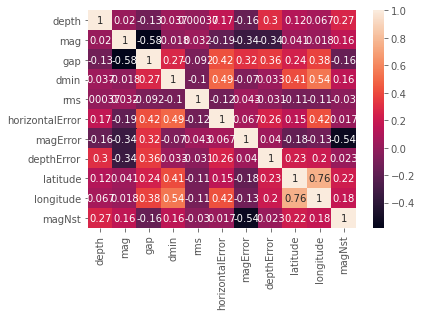

In [33]:
data = pd.DataFrame(df, columns=['depth','mag','gap','dmin','rms','horizontalError', 'magError', 'depthError', 'latitude', 'longitude', 'magNst'])
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrixhor

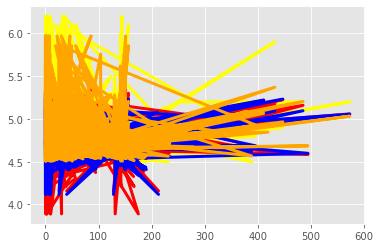

In [34]:
plt.plot(X_test, y_test, color = 'yellow', linewidth = 3)
plt.plot(X_test, Linear_predictions, color = 'red', linewidth = 3)
plt.plot(X_test, Lasso_predictions, color = 'blue', linewidth = 3)
plt.plot(X_test, Random_predictions, color = 'orange', linewidth = 3)
plt.show()

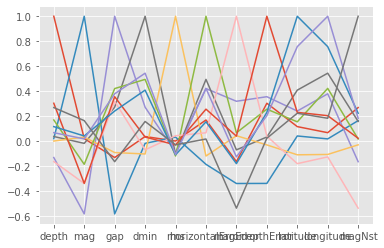

In [35]:
plt.plot(corrMatrix)
plt.show()

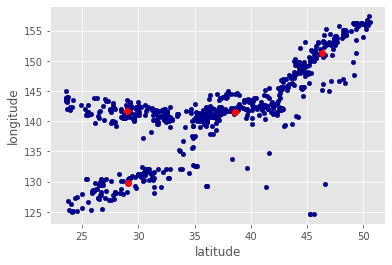

In [36]:
K = df[['latitude', 'longitude']]
from sklearn.cluster import KMeans
K_Means = KMeans(n_clusters=4).fit(K)
K.plot.scatter(x='latitude', y='longitude', c='DarkBlue')
K_Means.predict(K)
K_clustering = K_Means.cluster_centers_
for i in range (0,4):
    plt.plot(K_clustering[i][0], K_clustering[i][1], 'ro')
plt.show()

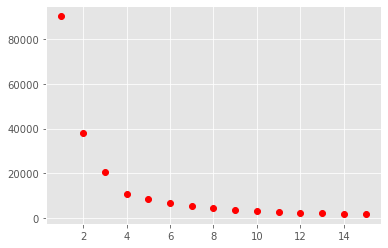

In [37]:
distances = []
for i in range (1,16):
    K_Means = KMeans(n_clusters=i).fit(K)
    distances.append(K_Means.inertia_)
for i in range (0,15):
    plt.plot(i+1, distances[i], 'ro')
plt.show()

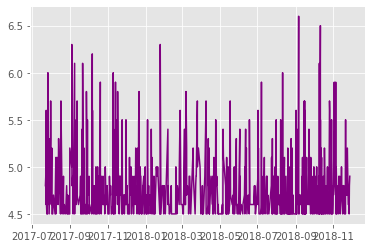

In [48]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
y = df["mag"]
X = pd.DataFrame()
X['ds'] = pd.to_datetime(df["time"], utc=True)
X['ds'] = X['ds'].dt.tz_localize(None)
X['y'] = y
plt.plot(X['ds'], X['y'], color='purple')
plt.show()